# Lab9 - Spatial Data Analysis
Exploratory spatial data analysis of CitiBike data using pysal and geopandas

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Import initial libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
import os

## Working with Shape File

### Loading Census Tract Shape File¶

In [3]:
from geopandas import GeoDataFrame
srcdir = os.getenv("HOME") + "/PUIdata"
shape_path = "Data/CT_Shape/ct_shape.shp"
ct_shape = GeoDataFrame.from_file(srcdir + "/" + shape_path)
ct_shape.index = ct_shape.BoroCT2010

### Coordinate systems, projections, and transformations 

In [4]:
from fiona.crs import from_epsg
ct_shape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N
                               # | epsg=2263 is US feet
NYC_Area = ct_shape.to_crs(epsg=2263).geometry.area.sum() / (2.788 * 10**7) # from ft2 to mi2 
print 'total NYC land area: %s (mi^2)'%str(NYC_Area)[:5] # from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: 302.3 (mi^2)


### Visualize the Cencus Tract boundaries colored by boroughs

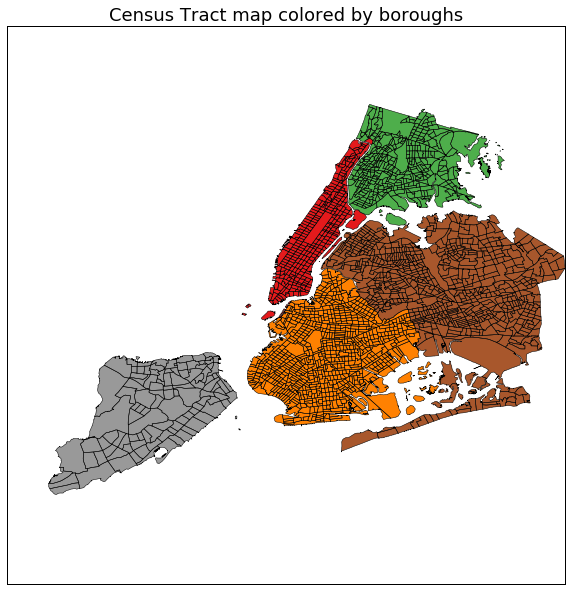

In [5]:
f, ax = plt.subplots(figsize=(10, 10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='BoroCode', alpha=1, linewidth=0.5, ax=ax)
plt.title("Census Tract map colored by boroughs", fontsize=18)

Figure 1. Map of the census tracts of the 5 boroughs of New York City, colored by borough.

### Map NYC Population density

#### Load Census Data for 2010

In [6]:
ct_data = DataFrame.from_csv(srcdir + '/Data/ACS_CT2010.csv')
#set index to be the BoroCT2010 code
ct_data.index = ct_data.BoroCT2010.astype(str)

#### Add popuation density to CT shapefile

In [7]:
#SE_T002_002 is population density in social explorer dataset
ct_shape_pop=ct_shape.join(ct_data[['SE_T002_002']])

#### Visualize the Population density for 2010

/opt/rh/anaconda/root/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


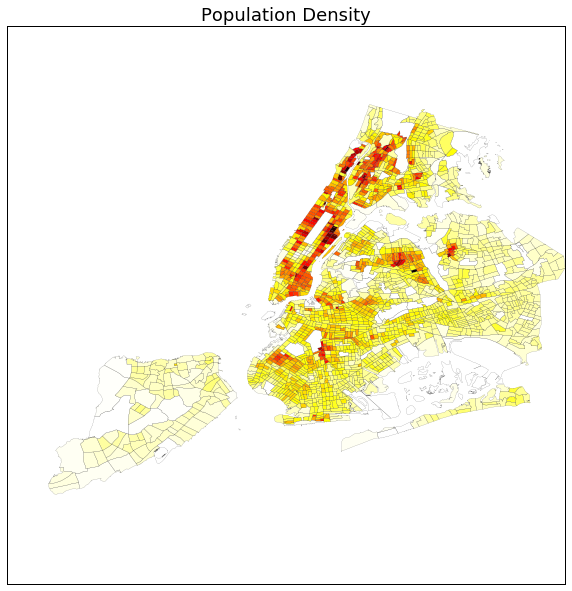

In [8]:
f, ax = plt.subplots(figsize=(10, 10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_pop.plot(column='SE_T002_002', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("Population Density", fontsize=18)

Figure 2. Population density of New York City census tracts

## Explore CitiBike data

### Load CitiBike data

In [9]:
df_bike_monthly = DataFrame.from_csv(srcdir + '/Data/CitiBike_monthly_byStation.csv')
df_bike_monthly.head()

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,2920,4409,10456,3520,8928,3237,2530,3909,4169,2542,...,0,0,0,0,0,0,0,0,0,0
2013-11-30,1883,2731,6384,2446,5201,2085,1415,2727,3146,1539,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_bike_summer = df_bike_monthly[(df_bike_monthly.index.month >= 6) &
                                     (df_bike_monthly.index.month <= 8)]
df_bike_summer.head(5)

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2014-06-30,2048,3306,9626,3515,7255,2942,1917,3702,3694,2422,...,0,0,0,0,0,0,0,0,0,0
2014-07-31,2252,3216,9825,3509,7014,3224,2195,3732,4042,2268,...,0,0,0,0,0,0,0,0,0,0
2014-08-31,2179,3004,10196,3573,7328,3311,2213,4078,4011,2168,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_bike_winter = df_bike_monthly[(df_bike_monthly.index.month <= 3)]
df_bike_winter.head(5)

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2014-01-31,956,1337,3178,1251,1920,1130,477,1412,1082,681,...,0,0,0,0,0,0,0,0,0,0
2014-02-28,650,960,2920,676,1808,933,508,1045,963,530,...,0,0,0,0,0,0,0,0,0,0
2014-03-31,804,1559,5102,1441,2643,1477,849,2004,2105,880,...,0,0,0,0,0,0,0,0,0,0
2015-01-31,833,0,3186,1248,1992,1429,442,1499,1366,619,...,0,0,0,0,0,0,0,0,0,0
2015-02-28,562,0,2130,913,1363,1140,356,1023,891,447,...,0,0,0,0,0,0,0,0,0,0


### Time Series Aanalysis

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(-200, 16000)

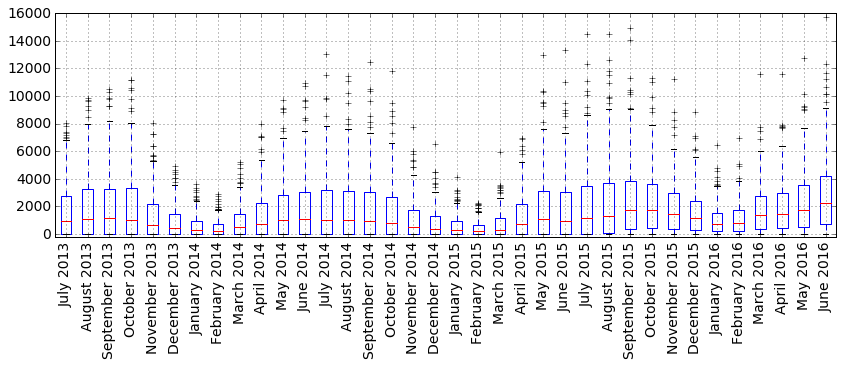

In [14]:
plt.rcParams['font.size']=14
f, ax = plt.subplots(figsize=(14, 4))
#create a copy of the df for the viz purposes
df_bike_monthly_ = df_bike_monthly.copy()
df_bike_monthly_.index = df_bike_monthly_.index.strftime("%B %Y")
df_bike_monthly_.T.boxplot(figsize=(15, 7),ax=ax,rot=90);
ax.set_ylim([-200, 16000])

Figure 3. Ridership by month

#### Seasonal Decomposition

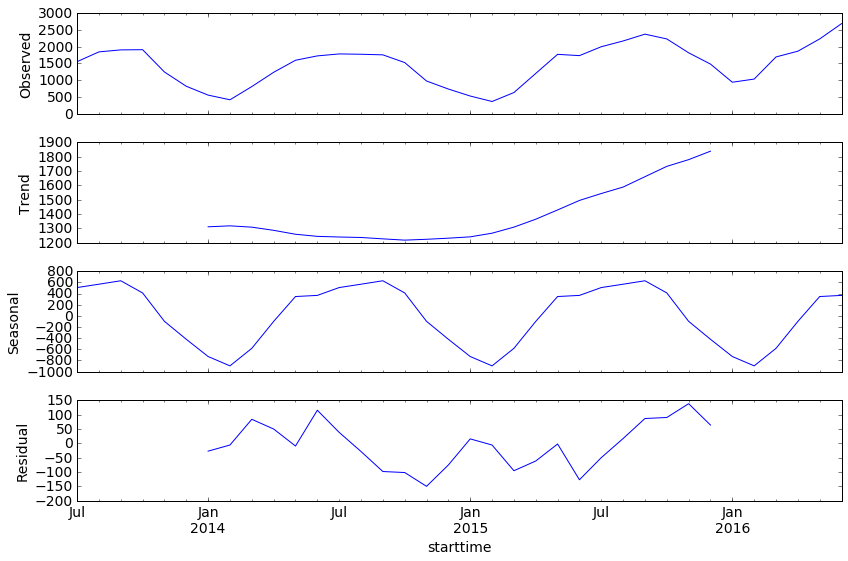

In [24]:
import statsmodels.api as sm

#Create a monthly time series of bike ride (Average of all citibike stations)
df_new=df_bike_monthly.mean(1).resample('M').mean()
df_new.interpolate(inplace=True)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(df_new.dropna())
plt.rcParams['figure.figsize'] = (12, 8)
resplot = res.plot()

Figure 4. Decomposition of the monthly ridership totals into trend, seasonal variation and residual

## Map CitiBike Data to CT level

### Load CitiBike station location data

In [25]:
station_id = DataFrame.from_csv(srcdir + '/Data/Station_id.csv')
#convert station_ids to string index
station_id.index = station_id.index.astype(str)
station_id.head()

,lat,lon
1000,40.753231,-73.970325
1001,40.749718,-74.002950
1002,40.730287,-73.990765
1003,40.718939,-73.992663
1004,40.734927,-73.992005


### Create CitiBike station Geometry (Point) from Corrdinates (Lat & Lon)

In [26]:
import shapely
# combine lat and lon to one column
station_id['lonlat'] = zip(station_id.lon, station_id.lat)
# Create Point Geometry for based on lonlat column
station_id['geometry'] = station_id[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
station_id.head()

,lat,lon,lonlat,geometry
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098)
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753)
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666)
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904)
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695)


### Intersect the two geometries

In [27]:
a = []
# check for each citibike stations to see what CT they are belong to
for i in range(len(station_id)):
    a.append(ct_shape[ct_shape.geometry.intersects(station_id.iloc[i].geometry)]
             .BoroCT2010.values[0])
    print '\r',"%",str((i + 1) * 100. / len(station_id))[:4],
station_id['BoroCT2010'] = a

% 100.


In [28]:
station_id.BoroCT2010.head()

1000    1009000
1001    1009900
1002    1005700
1003    1001800
1004    1006100
Name: BoroCT2010, dtype: object

### Add Monthly rides to the station GeoDataFrame with CT code

In [29]:
### Create average monthly rides column from monthly citibike data
### and add it to the station id which has the geometry
station_id['MonthlyAve'] = df_bike_monthly.sum()
station_id['WinterAve'] = df_bike_winter.sum()
station_id['SummerAve'] = df_bike_summer.sum()

In [30]:
station_id.head()

,lat,lon,lonlat,geometry,BoroCT2010,MonthlyAve,WinterAve,SummerAve
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098),1009000,69308,8939,22422
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753),1009900,102824,10657,32869
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666),1005700,273525,37257,87375
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904),1001800,101949,13394,33018
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695),1006100,184044,21320,59890


### Add the monthly average rides to the CT shapefile 

In [31]:
# use the 
temp = station_id[['MonthlyAve', 'WinterAve', 'SummerAve']]
temp['station_id'] = station_id.index
temp.index = station_id['BoroCT2010']
ct_shape_Aves = ct_shape.join(temp)
ct_shape_Aves.fillna(0, inplace=True)

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


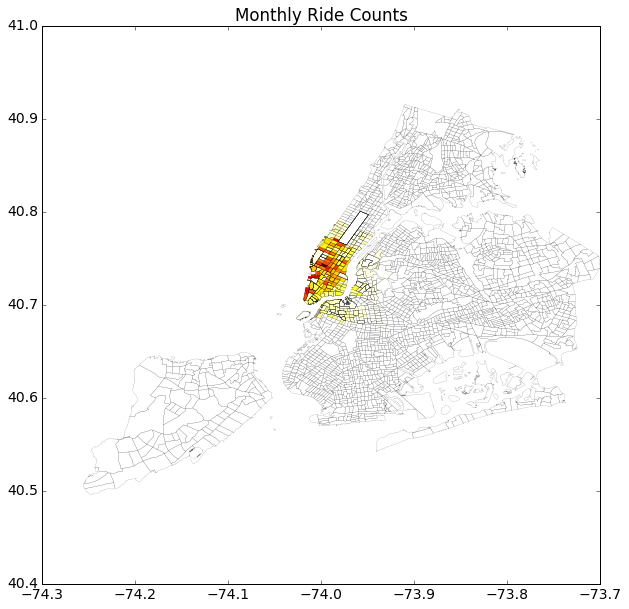

In [32]:
f, ax = plt.subplots(figsize=(10, 10))
ct_shape_Aves.plot(column='MonthlyAve', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("Monthly Ride Counts")

Figure 5. Monthly ride totals by tract. Since Citibike is limited to parts of Manhattan, Brooklyn, and Queens, most of the city is white. The summer and winter totals will be ignored at this extent and shown in the zoomed extent.

### Removing the CTs that are out of zoom boundries

In [40]:
ct_shape_MonthlyAve_Zoom = (ct_shape_Aves[ct_shape_Aves
                            .centroid
                            .apply(lambda c: c.x > -74.1 and c.x < -73.92 and c.y > 40.65
                                   and c.y < 40.8)])
ct_shape_WinterAve_Zoom = ct_shape_MonthlyAve_Zoom
ct_shape_SummerAve_Zoom = ct_shape_MonthlyAve_Zoom

In [34]:
print "Total number of CTs:", len(ct_shape)
print "Number of zoomed CTs:", len(temp.MonthlyAve)

Total number of CTs: 2166
Number of zoomed CTs: 543


### Map the monthly rides 

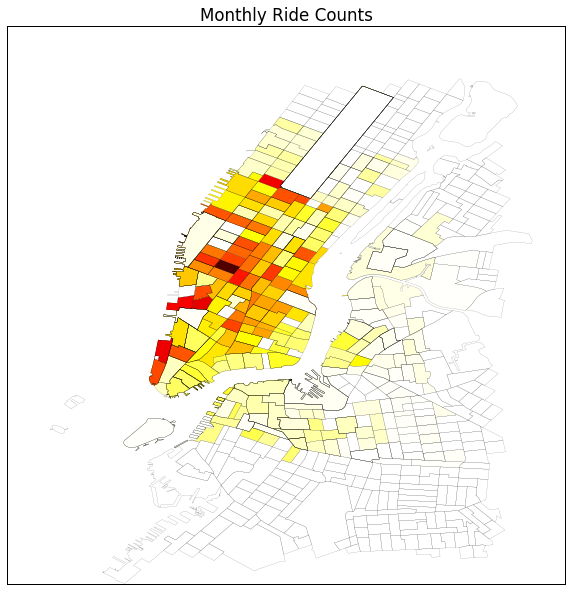

In [35]:
f, ax = plt.subplots(figsize=(10, 10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_MonthlyAve_Zoom.plot(column='MonthlyAve', colormap='hot_r', alpha=1,
                              linewidth=0.1, ax=ax)
plt.title("Monthly Ride Counts")

Figure 6a. Total monthly ride totals by census tract

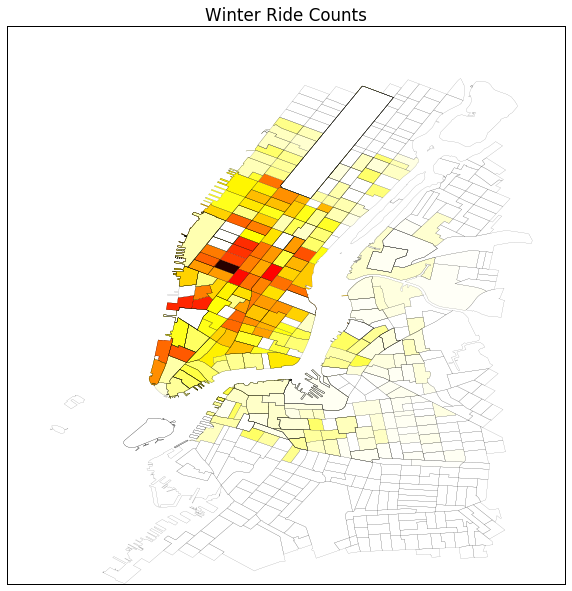

In [41]:
f, ax = plt.subplots(figsize=(10, 10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_WinterAve_Zoom.plot(column='WinterAve', colormap='hot_r', alpha=1,
                              linewidth=0.1, ax=ax)
plt.title("Winter Ride Counts")

Figure 6b. Winter ride totals by census tract

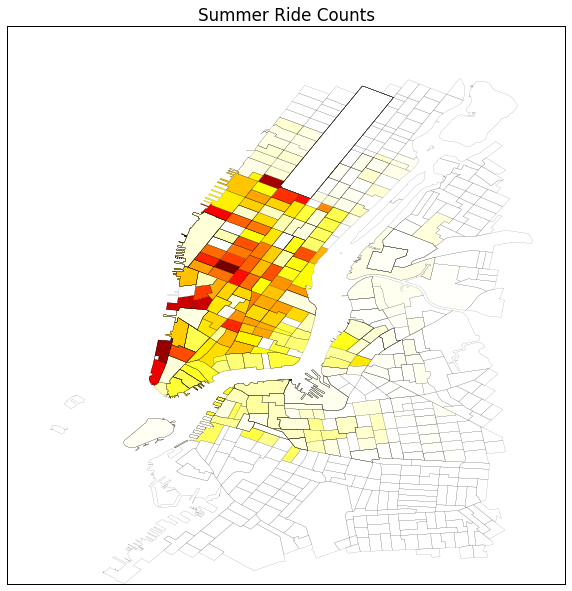

In [42]:
f, ax = plt.subplots(figsize=(10, 10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_SummerAve_Zoom.plot(column='SummerAve', colormap='hot_r', alpha=1,
                              linewidth=0.1, ax=ax)
plt.title("Summer Ride Counts")

Figure 6c. Summer ride counts by census tract

### Export Shapefile CTs in the CitiBike Zone

In [43]:
def set_dest(setype):
    return srcdir + "/Output/ct_shape_" + setype + "Ave_Zoom.shp"
path = srcdir + '/Output/ct_shape_MonthlyAve_Zoom.shp'
ct_shape_MonthlyAve_Zoom.to_file(set_dest("Monthly"))
ct_shape_WinterAve_Zoom.to_file(set_dest("Winter"))
ct_shape_SummerAve_Zoom.to_file(set_dest("Summer"))

## Exploratory Geospatial Analysis

In [44]:
import pysal as ps

### Spatial Weights
Contiguity: Queen Weights

In [45]:
qW_CT = ps.queen_from_shapefile(path)
qW_CT_wn = ps.queen_from_shapefile(set_dest("Winter"))
qW_CT_sm = ps.queen_from_shapefile(set_dest("Summer"))

('Island id: ', [0])
('Island id: ', [0])
('Island id: ', [0])


#### Neighbors of index10

In [46]:
print(qW_CT[10])
print(qW_CT_wn[10])
print(qW_CT_sm[10])

{1: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 8: 1.0, 9: 1.0, 18: 1.0, 19: 1.0, 30: 1.0}
{1: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 8: 1.0, 9: 1.0, 18: 1.0, 19: 1.0, 30: 1.0}
{1: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 8: 1.0, 9: 1.0, 18: 1.0, 19: 1.0, 30: 1.0}


In [48]:
print(qW_CT.cardinalities[10])
print(qW_CT_wn.cardinalities[10])
print(qW_CT_sm.cardinalities[10])

9
9
9


#### Matrix of Weights

In [49]:
Wmatrix, ids = qW_CT.full()
Wmatrix_wn, ids_sm = qW_CT_wn.full()
Wmatrix_sm, ids_sm = qW_CT_sm.full()

In [50]:
Wmatrix_sm

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

#### Change the matrix to be row-standardized

In [51]:
qW_CT.transform = 'r'
qW_CT_sm.transform = 'r'
qW_CT_wn.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 0, ' is an island (no neighbors)')


### Spatial Lag  
Similarity of CT neibors can be meseard by means of spatial lag as follow:
$$BikeRideCountLag = \sum_j w_{i,j} BikeRideCount$$

In [52]:
MonthlyRide = ct_shape_MonthlyAve_Zoom.MonthlyAve
MonthlyRideLag = ps.lag_spatial(qW_CT, MonthlyRide)
MonthlyRide_wn = ct_shape_WinterAve_Zoom.WinterAve
MonthlyRideLag_wn = ps.lag_spatial(qW_CT_wn, MonthlyRide_wn)
MonthlyRide_sm = ct_shape_SummerAve_Zoom.SummerAve
MonthlyRideLag_sm = ps.lag_spatial(qW_CT_sm, MonthlyRide_sm)

#### Create Quantiles for maping

In [53]:
MonthlyRideLagQ10 = ps.Quantiles(MonthlyRideLag, k=10)
print(MonthlyRideLagQ10)
WinterRideLagQ10 = ps.Quantiles(MonthlyRideLag_wn, k=10)
print(WinterRideLagQ10)
SummerRideLagQ10 = ps.Quantiles(MonthlyRideLag_sm, k=10)
print(SummerRideLagQ10)

                    Quantiles                    
 
  Lower                Upper                Count
             x[i] <=      0.000               140
     0.000 < x[i] <=    237.571                21
   237.571 < x[i] <=   4167.561                78
  4167.561 < x[i] <=  10026.857                80
 10026.857 < x[i] <=  17493.404                79
 17493.404 < x[i] <=  26977.053                80
 26977.053 < x[i] <=  58126.278                79
 58126.278 < x[i] <=  81788.042                80
 81788.042 < x[i] <=  96870.015                79
 96870.015 < x[i] <= 151983.357                80
                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               159
    0.000 < x[i] <=    39.286                 2
   39.286 < x[i] <=   643.458                78
  643.458 < x[i] <=  1542.231                80
 1542.231 < x[i] <=  2423.257                79
 2423.257 < x[i] <=  3482.583                80
 3482.583 < 

#### Map the monthly rides lag

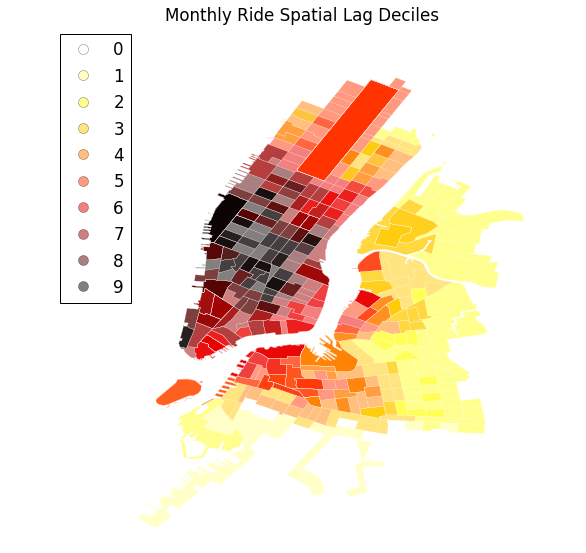

In [54]:
f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=MonthlyRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Monthly Ride Spatial Lag Deciles")


Figure 7a. Spatial lag deciles for the overall ridership

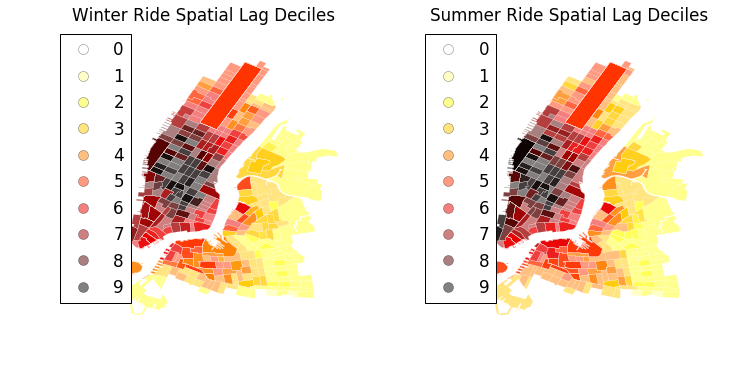

In [58]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ct_shape_WinterAve_Zoom.assign(cl=WinterRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax1, 
        edgecolor='white', legend=True)
ax1.set_axis_off()
ax1.set_title("Winter Ride Spatial Lag Deciles")
ct_shape_SummerAve_Zoom.assign(cl=SummerRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax2, 
        edgecolor='white', legend=True)
ax2.set_axis_off()
ax2.set_title("Summer Ride Spatial Lag Deciles")

Figure 7b. Comparison of the spatial lag deciles for the winter (left) and summer (right).

## Global  Spatial Autocorrelation

In [59]:
b, a = np.polyfit(MonthlyRide, MonthlyRideLag, 1)
print("Overall: {}, {}".format(b, a))
bwn, awn = np.polyfit(MonthlyRide_wn, MonthlyRideLag_wn, 1)
print("Winter: {}, {}".format(bwn, awn))
bsm, asm = np.polyfit(MonthlyRide_sm, MonthlyRideLag_sm, 1)
print("Summer: {}, {}".format(bsm, asm))

Overall: 0.655636692829, 12557.6370624
Winter: 0.659369456955, 1636.84839455
Summer: 0.643354908154, 4220.55529808


### Moran Scatterplot

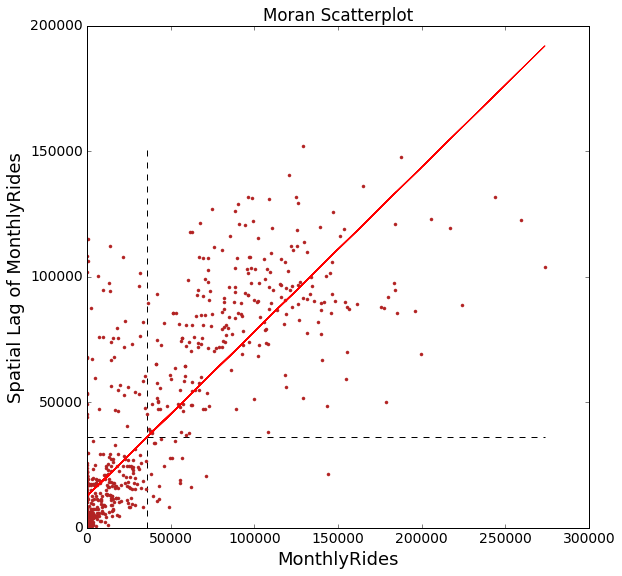

In [63]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(MonthlyRide, MonthlyRideLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide.mean(), MonthlyRideLag.min(), MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag.mean(), MonthlyRide.min(), MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide, a + b * MonthlyRide, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of MonthlyRides', fontsize=18)
plt.xlabel('MonthlyRides', fontsize=18)

Figure 8a. Scatter plot covering the overall ridership and spatial lag

(0, 120000)

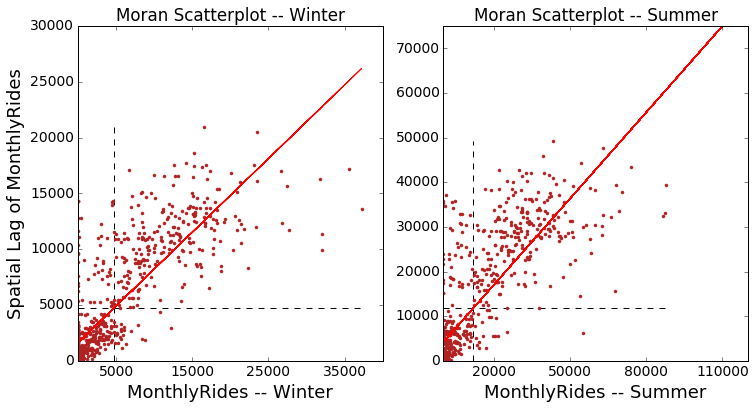

In [69]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1.plot(MonthlyRide_wn, MonthlyRideLag_wn, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
ax1.vlines(MonthlyRide_wn.mean(), MonthlyRideLag_wn.min(),
           MonthlyRideLag_wn.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
ax1.hlines(MonthlyRideLag_wn.mean(), MonthlyRide_wn.min(), MonthlyRide_wn.max(), linestyle='--')

# red line of best fit using global I as slope
ax1.plot(MonthlyRide_wn, awn + bwn * MonthlyRide_wn, 'r')
ax1.set_title('Moran Scatterplot -- Winter')
ax1.set_ylabel('Spatial Lag of MonthlyRides', fontsize=18)
ax1.set_xlabel('MonthlyRides -- Winter', fontsize=18)
ax1.set_xticks([5000, 15000, 25000, 35000])

ax2.plot(MonthlyRide_sm, MonthlyRideLag_sm, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
ax2.vlines(MonthlyRide_sm.mean(), MonthlyRideLag_sm.min(),
           MonthlyRideLag_sm.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
ax2.hlines(MonthlyRideLag_sm.mean(), MonthlyRide_sm.min(), MonthlyRide_sm.max(), linestyle='--')

# red line of best fit using global I as slope
ax2.plot(MonthlyRide, asm + bsm * MonthlyRide, 'r')
ax2.set_title('Moran Scatterplot -- Summer')
#plt.ylabel('Spatial Lag of MonthlyRides', fontsize=18)
ax2.set_xlabel('MonthlyRides -- Summer', fontsize=18)
ax2.set_xticks([20000, 50000, 80000, 110000])
ax2.set_ylim(0, 75000)
ax2.set_xlim(0, 120000)

Figure 8b. Moran scatterplot for winter (left) and summer (right) ridership.

### Moran's I

In [70]:
I_MonthlyRide = ps.Moran(MonthlyRide, qW_CT)
I_WinterRide = ps.Moran(MonthlyRide_wn, qW_CT_wn)
I_SummerRide = ps.Moran(MonthlyRide_sm, qW_CT_sm)

In [71]:
print("Overall: {} {}".format(I_MonthlyRide.I, I_MonthlyRide.p_sim))
print("Winter: {} {}".format(I_WinterRide.I, I_WinterRide.p_sim))
print("Summer: {} {}".format(I_SummerRide.I, I_SummerRide.p_sim))

Overall: 0.655793329084 0.001
Winter: 0.659513830175 0.001
Summer: 0.64353398667 0.001


Thus, the $I$ statistic is $0.660$ in the winter and $0.644$ in the summer for this data, and has a very small $p$ value for both seasons. 

In [73]:
print("Overall")
print(I_MonthlyRide.sim[0:10])
print("Winter")
print(I_WinterRide.sim[0:10])
print("Summer")
print(I_SummerRide.sim[0:10])

Overall
[-0.0033822  -0.00990158  0.01818338  0.00011936 -0.02183438  0.03927959
 -0.01121317  0.00405729  0.03192713  0.01885799]
Winter
[-0.01659804  0.05094295  0.00708381  0.00948688 -0.01248736  0.026096
  0.00436898 -0.02137952 -0.0022366   0.02638914]
Summer
[-0.0049235   0.00440338  0.01794648 -0.02050639 -0.01470725  0.02068315
  0.02316272 -0.01640215  0.02611532  0.00239758]


### KDEplot of all of the simulated points
the vertical line shows the observed value

In [87]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (14, 9)

/opt/rh/anaconda/root/lib/python2.7/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.1, right=-0.1
  'left=%s, right=%s') % (left, right))


(-0.7, 0.7)

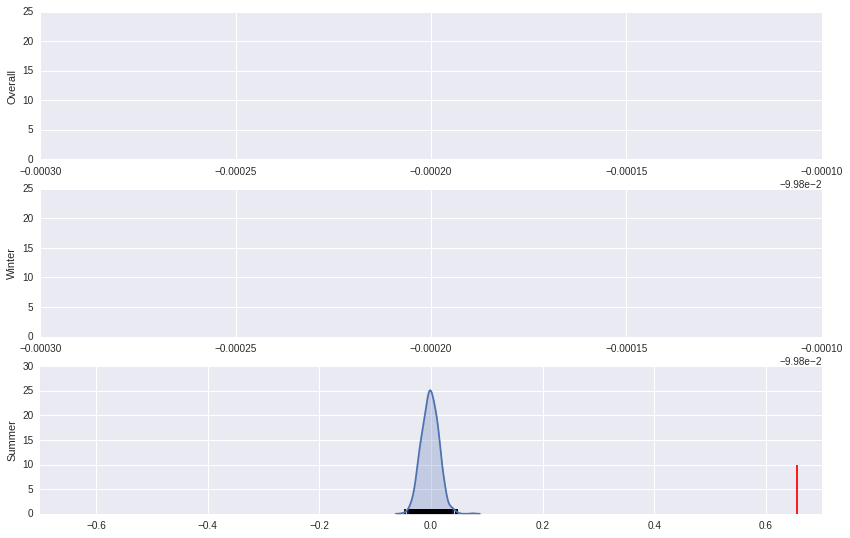

In [90]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=3)
sns.kdeplot(I_MonthlyRide.sim, shade=True, ax=ax1)
ax1.set_ylabel("Overall")
ax1.set_xlim([-.10, -.10])
sns.kdeplot(I_WinterRide.sim, shade=True, ax=ax2)
ax2.set_ylabel("Winter")
ax2.set_xlim([-.10, -.10])
sns.kdeplot(I_SummerRide.sim, shade=True, ax=ax3)
ax3.set_ylabel("Summer")
plt.vlines(I_MonthlyRide.sim, 0, 1)
plt.vlines(I_MonthlyRide.I, 0, 10, 'r')
ax3.set_xlim([-.70, .70])

In the following figure the vertical line is showing if our $I$ statistic were close to our expected value

(-0.7, 0.7)

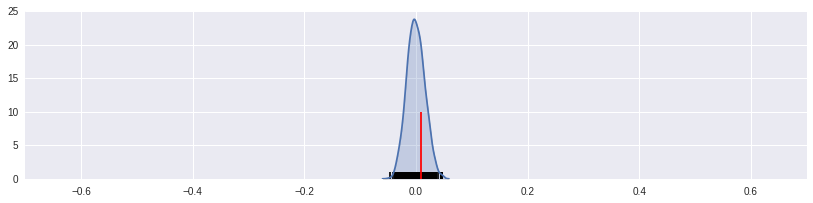

In [91]:
plt.rcParams['figure.figsize'] = (14, 3)
sns.kdeplot(I_MonthlyRide.sim, shade=True)
plt.vlines(I_MonthlyRide.sim, 0, 1)
plt.vlines(I_MonthlyRide.EI + .01, 0, 10, 'r')
plt.xlim([-.70, .70])

Figure 9a.

(-0.7, 0.7)

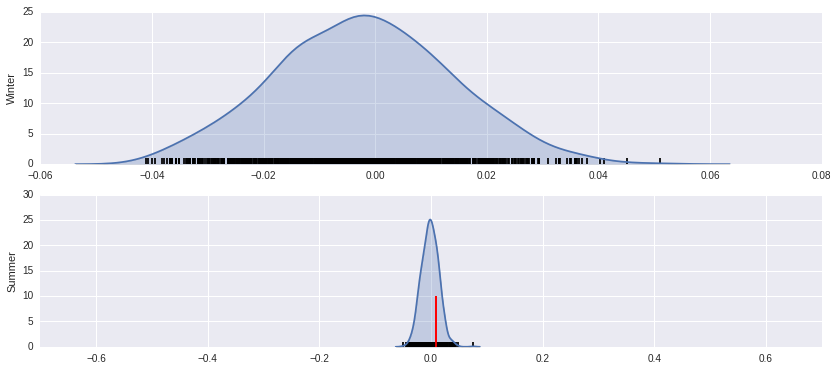

In [94]:
plt.rcParams['figure.figsize'] = (14, 6)
f, (ax1, ax2) = plt.subplots(nrows=2)
sns.kdeplot(I_WinterRide.sim, shade=True, ax=ax1)
ax1.set_ylabel("Winter")
ax1.vlines(I_WinterRide.sim, 0, 1)
ax2.vlines(I_WinterRide.EI + .01, 0, 10, 'r')
sns.kdeplot(I_SummerRide.sim, shade=True, ax=ax2)
ax2.set_ylabel("Summer")
ax2.vlines(I_SummerRide.sim, 0, 1)
ax2.vlines(I_SummerRide.EI + .01, 0, 10, 'r')
plt.xlim([-.70, .70])

Figure 9b.

## Local  Spatial Autocorrelation

In [96]:
LMo_MonthlyRide = ps.Moran_Local(MonthlyRide, qW_CT, permutations=999)
LMo_WinterRide = ps.Moran_Local(MonthlyRide_wn, qW_CT_wn, permutations=999)
LMo_SummerRide = ps.Moran_Local(MonthlyRide_sm, qW_CT_sm, permutations=999)

In [97]:
(LMo_MonthlyRide.Is[0:5], LMo_MonthlyRide.p_sim[0:5], LMo_WinterRide.Is[0:5],
 LMo_WinterRide.p_sim[0:5], LMo_SummerRide.Is[0:5], LMo_SummerRide.p_sim[0:5])

(array([-0.        , -0.25378156,  0.00285019,  0.00186   ,  0.00802061]),
 array([ 0.001,  0.165,  0.411,  0.391,  0.445]),
 array([-0.        , -0.32301466, -0.00151236,  0.00049853, -0.05866435]),
 array([ 0.001,  0.127,  0.436,  0.484,  0.453]),
 array([-0.        , -0.2391325 ,  0.01474643,  0.00173718,  0.02473794]),
 array([ 0.001,  0.189,  0.35 ,  0.322,  0.369]))

### LISA (Local Indicators of Spatial Autocorrelation)

In [98]:
sigs = MonthlyRide[LMo_MonthlyRide.p_sim <= .001]
W_sigs = MonthlyRideLag[LMo_MonthlyRide.p_sim <= .001]
insigs = MonthlyRide[LMo_MonthlyRide.p_sim > .001]
W_insigs = MonthlyRideLag[LMo_MonthlyRide.p_sim > .001]

sigs_wn = MonthlyRide_wn[LMo_WinterRide.p_sim <= .001]
W_sigs_wn = MonthlyRideLag_wn[LMo_WinterRide.p_sim <= .001]
insigs_wn = MonthlyRide_wn[LMo_WinterRide.p_sim > .001]
W_insigs_wn = MonthlyRideLag_wn[LMo_WinterRide.p_sim > .001]

sigs_sm = MonthlyRide_sm[LMo_SummerRide.p_sim <= .001]
W_sigs_sm = MonthlyRideLag_sm[LMo_SummerRide.p_sim <= .001]
insigs_sm = MonthlyRide_sm[LMo_SummerRide.p_sim > .001]
W_insigs_sm = MonthlyRideLag_sm[LMo_SummerRide.p_sim > .001]

### Plot Signficant LISA

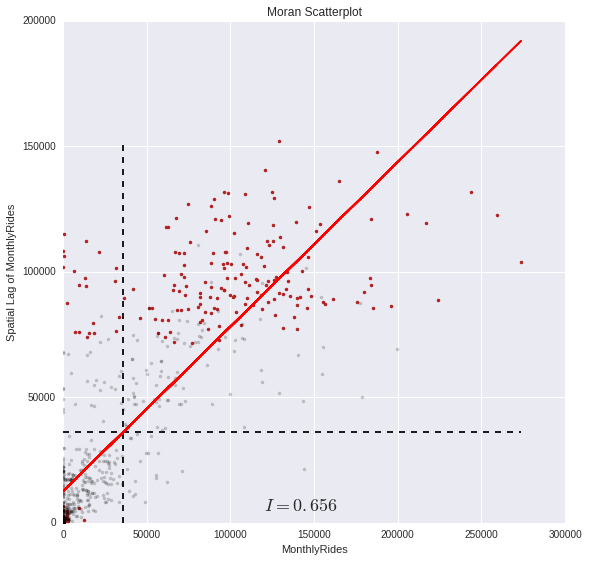

In [100]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_MonthlyRide.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide.mean(), MonthlyRideLag.min(), MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag.mean(), MonthlyRide.min(), MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide, a + b*MonthlyRide, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of MonthlyRides')
plt.xlabel('MonthlyRides')


Figure 10a.

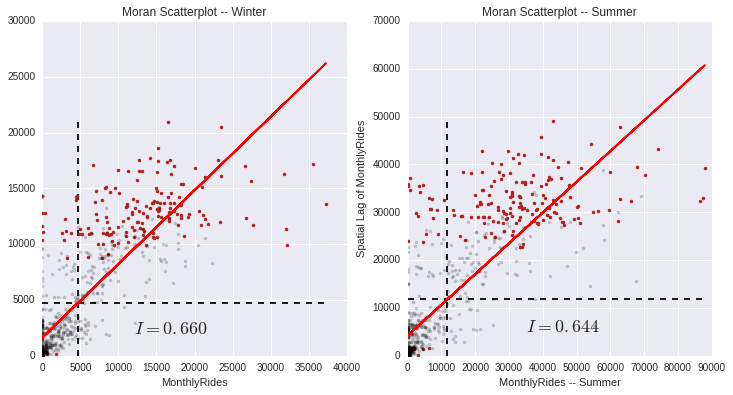

In [103]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.plot(sigs_wn, W_sigs_wn, '.', color='firebrick')
ax1.plot(insigs_wn, W_insigs_wn, '.k', alpha=.2)
ax1.text(s='$I = %.3f$' % I_WinterRide.I, x=12000, y=2000, fontsize=18)

 # dashed vert at mean of the last year's PCI
ax1.vlines(MonthlyRide_wn.mean(), MonthlyRideLag_wn.min(),
           MonthlyRideLag_wn.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
ax1.hlines(MonthlyRideLag_wn.mean(), MonthlyRide_wn.min(), MonthlyRide_wn.max(), linestyle='--')

# red line of best fit using global I as slope
ax1.plot(MonthlyRide_wn, awn + bwn * MonthlyRide_wn, 'r')
ax1.set_title('Moran Scatterplot -- Winter')
plt.ylabel('Spatial Lag of MonthlyRides')
ax1.set_xlabel('MonthlyRides')

ax2.plot(sigs_sm, W_sigs_sm, '.', color='firebrick')
ax2.plot(insigs_sm, W_insigs_sm, '.k', alpha=.2)
ax2.text(s='$I = %.3f$' % I_SummerRide.I, x=35000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
ax2.vlines(MonthlyRide_sm.mean(), MonthlyRideLag_sm.min(),
           MonthlyRideLag_sm.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
ax2.hlines(MonthlyRideLag_sm.mean(), MonthlyRide_sm.min(), MonthlyRide_sm.max(), linestyle='--')

# red line of best fit using global I as slope
ax2.plot(MonthlyRide_sm, asm + bsm * MonthlyRide_sm, 'r')
ax2.set_title('Moran Scatterplot -- Summer')
#plt.ylabel('Spatial Lag of MonthlyRides')
ax2.set_xlabel('MonthlyRides -- Summer')

Figure 10b.

### Hot and Cold spots 

In [104]:
sig = LMo_MonthlyRide.p_sim < 0.01
hotspots = LMo_MonthlyRide.q==1 * sig
coldspots = LMo_MonthlyRide.q==3 * sig
print "Number of Year-round Hotspots:", hotspots.sum()
print "Number of Year-round Coldspots:", coldspots.sum()
sig_wn = LMo_WinterRide.p_sim < 0.01
hotspots_wn = LMo_WinterRide.q==1 * sig_wn
coldspots_wn = LMo_WinterRide.q==3 * sig_wn
print "Number of Winter Hotspots:", hotspots_wn.sum()
print "Number of Winter Coldspots:", coldspots_wn.sum()
sig_sm = LMo_SummerRide.p_sim < 0.01
hotspots_sm = LMo_SummerRide.q==1 * sig_sm
coldspots_sm = LMo_SummerRide.q==3 * sig_sm
print "Number of Summer Hotspots:", hotspots_sm.sum()
print "Number of Summer Coldspots:", coldspots_sm.sum()

Number of Year-round Hotspots: 192
Number of Year-round Coldspots: 231
Number of Winter Hotspots: 196
Number of Winter Coldspots: 211
Number of Summer Hotspots: 190
Number of Summer Coldspots: 240


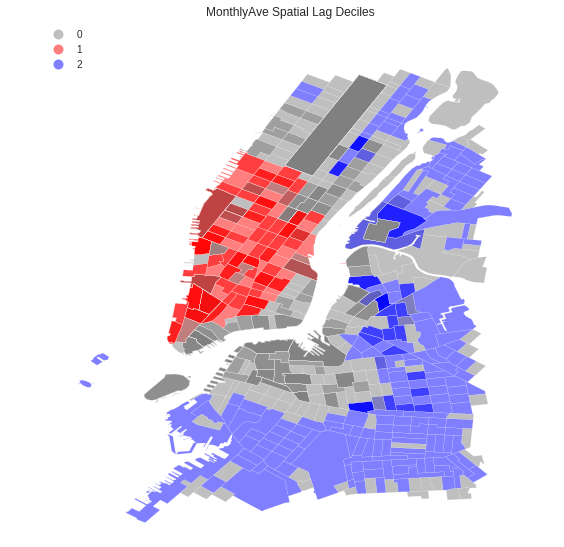

In [105]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots*1 + coldspots*2

f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("MonthlyAve Spatial Lag Deciles")

Figure 11a.

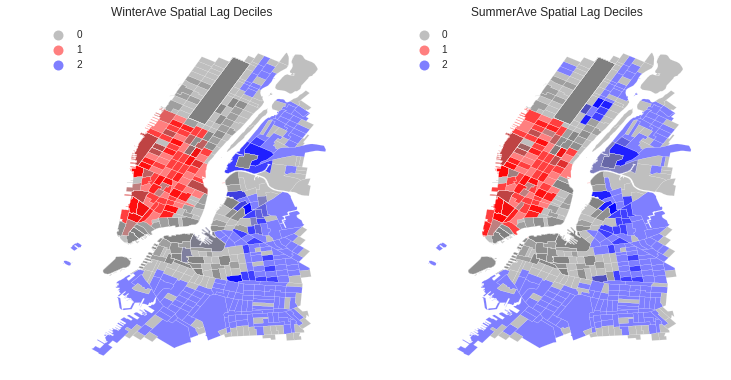

In [107]:
hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold_wn = hotspots_wn * 1 + coldspots_wn * 2

f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ct_shape_WinterAve_Zoom.assign(cl=hotcold_wn).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax1, 
        edgecolor='white', legend=True)
ax1.set_axis_off()
ax1.set_title("WinterAve Spatial Lag Deciles")

hotcold_sm = hotspots_sm * 1 + coldspots_sm * 2

ct_shape_SummerAve_Zoom.assign(cl=hotcold_sm).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax2, 
        edgecolor='white', legend=True)
ax2.set_axis_off()
ax2.set_title("SummerAve Spatial Lag Deciles")

Figure 11b.